In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as  sns

In [2]:
df = pd.read_csv('/Users/Dylan/Desktop/Netflix_Userbase.csv') 

In [3]:
df.info

<bound method DataFrame.info of       User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0           1             Basic               10  15-01-22          10-06-23   
1           2           Premium               15  05-09-21          22-06-23   
2           3          Standard               12  28-02-23          27-06-23   
3           4          Standard               12  10-07-22          26-06-23   
4           5             Basic               10  01-05-23          28-06-23   
...       ...               ...              ...       ...               ...   
2495     2496           Premium               14  25-07-22          12-07-23   
2496     2497             Basic               15  04-08-22          14-07-23   
2497     2498          Standard               12  09-08-22          15-07-23   
2498     2499          Standard               13  12-08-22          12-07-23   
2499     2500             Basic               15  13-08-22          12-07-23   

       

In [4]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [5]:
pd.options.display.float_format = '{:.5f}'.format
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.00000,2500.00000
mean,1250.50000,12.50840,38.79560
std,721.83216,1.68685,7.17178
min,1.00000,10.00000,26.00000
25%,625.75000,11.00000,32.00000
50%,1250.50000,12.00000,39.00000
75%,1875.25000,14.00000,45.00000
max,2500.00000,15.00000,51.00000


In [7]:
axis = 0 
axis = 1 

df = df.dropna()

In [8]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [9]:
df.count()

User ID              2500
Subscription Type    2500
Monthly Revenue      2500
Join Date            2500
Last Payment Date    2500
Country              2500
Age                  2500
Gender               2500
Device               2500
Plan Duration        2500
dtype: int64

In [10]:
df.shape

(2500, 10)

In [11]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [13]:
subscription_types = df['Subscription Type'].unique()
print(subscription_types)

['Basic' 'Premium' 'Standard']


In [14]:
plan_duration = df['Plan Duration'].unique()
print(plan_duration)

['1 Month']


In [15]:
different_prices = df['Monthly Revenue'].unique()
print(different_prices)

[10 15 12 13 11 14]


In [18]:
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Month'] = df['Join Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Monthly Revenue'].sum()

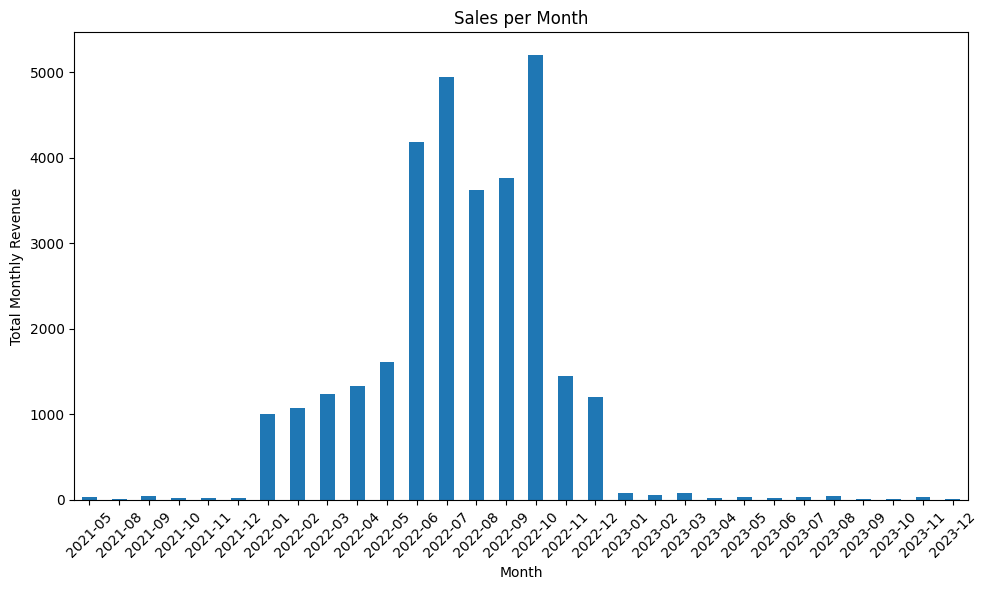

In [19]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Monthly Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
subscription_counts = df['Subscription Type'].value_counts()

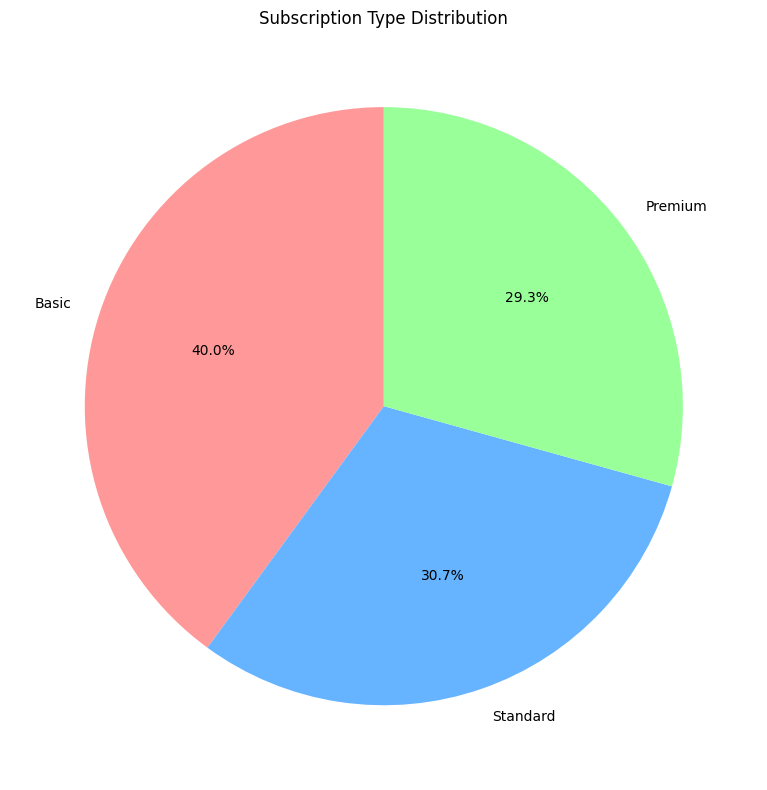

In [23]:
plt.figure(figsize=(8, 8))
subscription_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Subscription Type Distribution')
plt.ylabel('')  
plt.tight_layout()
plt.show()

In [24]:
gender_subscription_counts = pd.crosstab(df['Gender'], df['Subscription Type'])

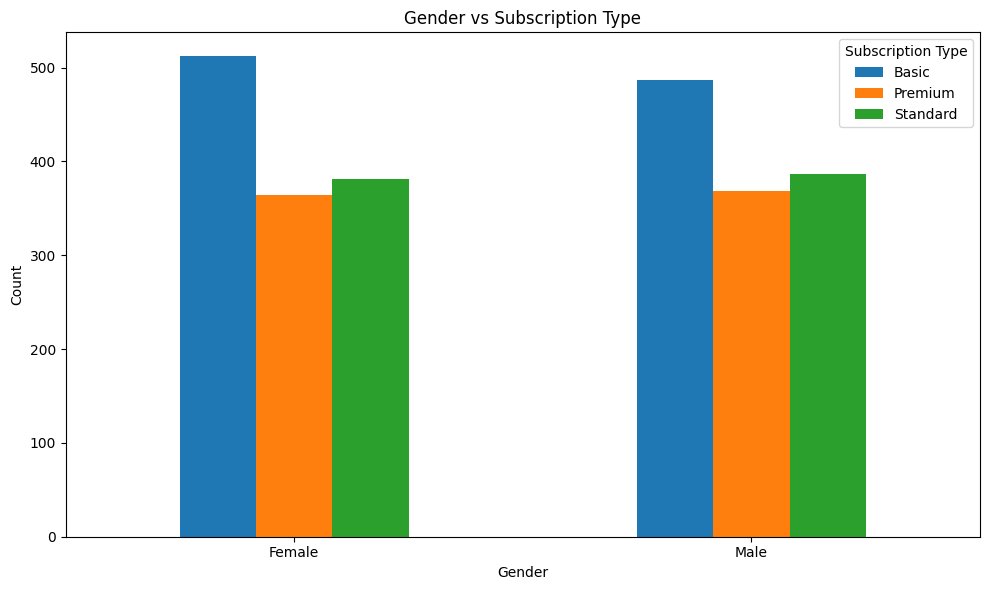

In [25]:
gender_subscription_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Gender vs Subscription Type')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Subscription Type')
plt.tight_layout()
plt.show()

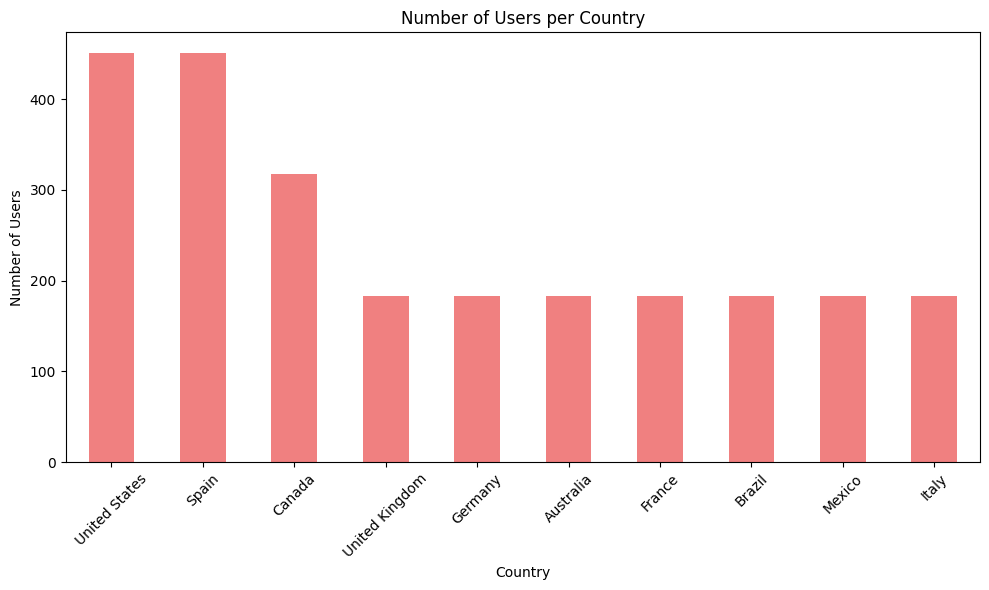

In [27]:
country_user_counts = df['Country'].value_counts()

# Plot the bar chart for number of users vs country
plt.figure(figsize=(10, 6))
country_user_counts.plot(kind='bar', color='lightcoral')
plt.title('Number of Users per Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
